In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/final_code/noisystudent-master') # root dictionary, the parent folder root of train and test folder
os.getcwd()

'/content/drive/My Drive/final_code/noisystudent-master'

In [3]:
ls

CONTRIBUTING.md          main.ipynb               __pycache__/
data_input.py            main.py                  randaugment.py
efficientnet_builder.py  mnist_example.py         README.md
efficientnet_model.py    noisystudent_svhn.ipynb  task_info.py
ladder_net.py            pic_500.xlsx             utils.py
LICENSE                  preprocessing.py
local_scripts/           proc_svhn.py


In [4]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [5]:
import tensorflow as tf
tf.__version__

'1.15.2'

In [0]:
import sys

sys.path[0]='/tensorflow-1.15.2/python3.6'
sys.path

In [0]:
!pip install keras==2.2.5

     |████████████████████████████████| 337kB 9.1MB/s 
  Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [0]:
# Find the best ratio
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes])

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

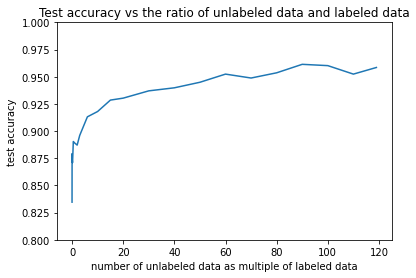

In [0]:
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.8, 1)
plt.show()  

In [0]:
print(acc_list)

[0.7407, 0.8084, 0.8477, 0.8715, 0.8735, 0.8879, 0.8754, 0.8795, 0.883, 0.8894, 0.8327, 0.8576, 0.8726, 0.8753, 0.8757, 0.88, 0.8916, 0.8808, 0.8895, 0.8828, 0.8731, 0.8839, 0.8872, 0.8946, 0.8998, 0.8991, 0.8962, 0.8964, 0.8971, 0.8996, 0.8706, 0.8748, 0.8877, 0.8974, 0.8961, 0.9005, 0.8963, 0.9052, 0.9098, 0.9076, 0.8912, 0.9031, 0.9099, 0.9173, 0.9132, 0.9242, 0.9195, 0.9252, 0.9274, 0.9324, 0.8968, 0.9141, 0.9158, 0.9281, 0.9289, 0.926, 0.9338, 0.9396, 0.9418, 0.9391, 0.9084, 0.9129, 0.9146, 0.9311, 0.9236, 0.9374, 0.9318, 0.9471, 0.9431, 0.948, 0.9072, 0.9225, 0.9279, 0.9286, 0.9445, 0.9425, 0.9453, 0.948, 0.9502, 0.9448, 0.9177, 0.9251, 0.9358, 0.938, 0.9391, 0.9457, 0.949, 0.9469, 0.9529, 0.9542, 0.9189, 0.9318, 0.9391, 0.9414, 0.9456, 0.9515, 0.9487, 0.9517, 0.951, 0.9552, 0.9058, 0.9233, 0.9297, 0.9322, 0.9431, 0.9444, 0.9522, 0.9538, 0.951, 0.9529, 0.9172, 0.9269, 0.9285, 0.9406, 0.9465, 0.9462, 0.9538, 0.9513, 0.9504, 0.9546, 0.9147, 0.9366, 0.9375, 0.9469, 0.9468, 0.9538, 0

In [0]:
# Delete all gaussian noise in the model above
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
size_list=[1,10,50,100,250,500,1000,1500,3000,5000,7500,10000,15000,20000,25000,30000,35000,40000,45000,50000,55000,59500]
acc_list=[]
labeled_size=500
for unlabel_size in size_list:
  random.seed(0)
  idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
  random.seed(1)
  idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
  x_train_unlabeled = x_train[idxs_unlabel]
  y_train_unlabeled = y_train[idxs_unlabel]
  x_train_labeled   = x_train[idxs_label]
  y_train_labeled   = y_train[idxs_label]
  if unlabel_size>=labeled_size:
    n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
    x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
    y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
  else:
    n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
    x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
    y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes],noise_std=0)

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list.append(acc)

In [0]:
import matplotlib.pyplot as plt
size_list_plot=np.array(size_list)
plt.plot(size_list_plot/500, acc_list)  
plt.title("Test accuracy vs the ratio of unlabeled data and labeled data")
plt.xlabel("number of unlabeled data as multiple of labeled data")
plt.ylabel("test accuracy")

plt.ylim(0.7, 1)
plt.show()  

In [6]:
#Change the norm of the gaussian noise
from __future__ import print_function

from keras.datasets import mnist
import keras
import random
from sklearn.metrics import accuracy_score
import numpy as np

from ladder_net import get_ladder_network_fc

inp_size = 28*28 # size of mnist dataset 
n_classes = 10
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, inp_size).astype('float32')/255
x_test  = x_test.reshape(10000,  inp_size).astype('float32')/255

y_train = keras.utils.to_categorical(y_train, n_classes)
y_test  = keras.utils.to_categorical(y_test,  n_classes)

idxs_label = range(x_train.shape[0])
idxs_unlabel = range(x_train.shape[0])
noise_list=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
acc_list_noise=[]
labeled_size=500
unlabel_size=40000
random.seed(0)
idxs_label = np.random.choice(x_train.shape[0], labeled_size, replace=False)
random.seed(1)
idxs_unlabel = np.random.choice(x_train.shape[0], unlabel_size, replace=False)
x_train_unlabeled = x_train[idxs_unlabel]
y_train_unlabeled = y_train[idxs_unlabel]
x_train_labeled   = x_train[idxs_label]
y_train_labeled   = y_train[idxs_label]
if unlabel_size>=labeled_size:
  n_rep = x_train_unlabeled.shape[0] // x_train_labeled.shape[0]
  x_train_labeled_rep = np.concatenate([x_train_labeled]*n_rep)
  y_train_labeled_rep = np.concatenate([y_train_labeled]*n_rep)
else:
  n_rep = x_train_labeled.shape[0] // x_train_unlabeled.shape[0]
  x_train_unlabeled_rep = np.concatenate([x_train_unlabeled]*n_rep)
  y_train_unlabeled_rep = np.concatenate([y_train_unlabeled]*n_rep)
for noise in noise_list:  
  model = get_ladder_network_fc(layer_sizes=[inp_size, 1000, 500, 250, 250, 250, n_classes],noise_std=noise)

  # train the model for 10 epochs
  for _ in range(10):
      if unlabel_size>=labeled_size:
        model.fit([x_train_labeled_rep, x_train_unlabeled], y_train_labeled_rep, epochs=1)
      else:
        model.fit([x_train_labeled, x_train_unlabeled_rep], y_train_labeled, epochs=1)
      y_test_pr = model.test_model.predict(x_test, batch_size=100)
      acc=accuracy_score(y_test.argmax(-1), y_test_pr.argmax(-1))
      print("Test accuracy : %f" % acc)
  acc_list_noise.append(acc)  

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 1.2690 - accuracy: 0.9743
Test accuracy : 0.888700
Epoch 1/1
   96/40000 [..............................] - ETA: 1:17 - loss: 0.3493 - accuracy: 1.0000

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 80s 2ms/step - loss: 0.3970 - accuracy: 0.9934
Test accuracy : 0.878400
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3986 - accuracy: 0.9933
Test accuracy : 0.882200
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3934 - accuracy: 0.9952
Test accuracy : 0.883500
Epoch 1/1
40000/40000 [==============================] - 79s 2ms/step - loss: 0.3905 - accuracy: 0.9959
Test accuracy : 0.889500
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3864 - accuracy: 0.9979
Test accuracy : 0.886400
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3850 - accuracy: 0.9975
Test accuracy : 0.876700
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3872 - accuracy: 0.9973
Test accuracy : 0.887100
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 0.3824 - accuracy: 0.9989
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 1.2564 - accuracy: 0.9931
Test accuracy : 0.886800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.1567 - accuracy: 0.9953
Test accuracy : 0.892800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.1197 - accuracy: 0.9948
Test accuracy : 0.905300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0967 - accuracy: 0.9968
Test accuracy : 0.908900
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 1.0817 - accuracy: 0.9983
Test accuracy : 0.898800
Epoch 1/1
40000/40000 [==============================] - 80s 2ms/step - loss: 1.0736 - accuracy: 0.9969
Test accuracy : 0.905000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0552 - accuracy: 0.9993
Test accuracy : 0.909400
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 1.0557 - accuracy: 0.9979
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 80s 2ms/step - loss: 2.6982 - accuracy: 0.9920
Test accuracy : 0.908800
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.5334 - accuracy: 0.9955
Test accuracy : 0.911200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.4697 - accuracy: 0.9957
Test accuracy : 0.906200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.4279 - accuracy: 0.9973
Test accuracy : 0.910400
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3991 - accuracy: 0.9974
Test accuracy : 0.914200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3779 - accuracy: 0.9979
Test accuracy : 0.914000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3553 - accuracy: 0.9983
Test accuracy : 0.916700
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 2.3256 - accuracy: 0.9991
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 4.5220 - accuracy: 0.9920
Test accuracy : 0.901200
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.3170 - accuracy: 0.9943
Test accuracy : 0.909300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.2375 - accuracy: 0.9962
Test accuracy : 0.916500
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.1722 - accuracy: 0.9959
Test accuracy : 0.906300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.1277 - accuracy: 0.9969
Test accuracy : 0.912000
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0808 - accuracy: 0.9984
Test accuracy : 0.922300
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0453 - accuracy: 0.9985
Test accuracy : 0.920600
Epoch 1/1
40000/40000 [==============================] - 81s 2ms/step - loss: 4.0241 - accuracy: 0.9980
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 82s 2ms/step - loss: 6.6448 - accuracy: 0.9897
Test accuracy : 0.914200
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.4035 - accuracy: 0.9920
Test accuracy : 0.911900
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.2657 - accuracy: 0.9947
Test accuracy : 0.929800
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.1699 - accuracy: 0.9952
Test accuracy : 0.930800
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.0957 - accuracy: 0.9962
Test accuracy : 0.937100
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 6.0097 - accuracy: 0.9974
Test accuracy : 0.928000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 5.9611 - accuracy: 0.9971
Test accuracy : 0.938700
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 5.9197 - accuracy: 0.9979
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 8.9354 - accuracy: 0.9853
Test accuracy : 0.924700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 8.6024 - accuracy: 0.9891
Test accuracy : 0.933200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 8.3702 - accuracy: 0.9909
Test accuracy : 0.935000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.2660 - accuracy: 0.9919
Test accuracy : 0.938200
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.1350 - accuracy: 0.9926
Test accuracy : 0.944000
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 8.0065 - accuracy: 0.9954
Test accuracy : 0.947400
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 7.9264 - accuracy: 0.9951
Test accuracy : 0.950100
Epoch 1/1
40000/40000 [==============================] - 82s 2ms/step - loss: 7.8583 - accuracy: 0.9952
Tes

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 11.2060 - accuracy: 0.9793
Test accuracy : 0.935000
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.7748 - accuracy: 0.9835
Test accuracy : 0.941800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.4558 - accuracy: 0.9861
Test accuracy : 0.946400
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.2566 - accuracy: 0.9877
Test accuracy : 0.948200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 10.1243 - accuracy: 0.9884
Test accuracy : 0.950400
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 9.9865 - accuracy: 0.9909
Test accuracy : 0.951800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 9.8606 - accuracy: 0.9917
Test accuracy : 0.954700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 9.7527 - accuracy: 0.992

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 83s 2ms/step - loss: 13.4188 - accuracy: 0.9670
Test accuracy : 0.938100
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.8550 - accuracy: 0.9745
Test accuracy : 0.945800
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 12.5271 - accuracy: 0.9765
Test accuracy : 0.949200
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.2724 - accuracy: 0.9802
Test accuracy : 0.952700
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 12.1051 - accuracy: 0.9819
Test accuracy : 0.954800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.9767 - accuracy: 0.9818
Test accuracy : 0.950800
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.8127 - accuracy: 0.9843
Test accuracy : 0.955400
Epoch 1/1
40000/40000 [==============================] - 83s 2ms/step - loss: 11.7469 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 84s 2ms/step - loss: 15.5656 - accuracy: 0.9524
Test accuracy : 0.934300
Epoch 1/1
40000/40000 [==============================] - 84s 2ms/step - loss: 14.9273 - accuracy: 0.9597
Test accuracy : 0.942900
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.5543 - accuracy: 0.9627
Test accuracy : 0.947200
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.2611 - accuracy: 0.9650
Test accuracy : 0.947600
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 14.0790 - accuracy: 0.9678
Test accuracy : 0.951800
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.8581 - accuracy: 0.9691
Test accuracy : 0.949600
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.7603 - accuracy: 0.9714
Test accuracy : 0.953500
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 13.5788 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 86s 2ms/step - loss: 17.9176 - accuracy: 0.9276
Test accuracy : 0.940200
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 17.1415 - accuracy: 0.9395
Test accuracy : 0.941100
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 16.6959 - accuracy: 0.9436
Test accuracy : 0.947500
Epoch 1/1
40000/40000 [==============================] - 86s 2ms/step - loss: 16.3615 - accuracy: 0.9473
Test accuracy : 0.948300
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 16.1402 - accuracy: 0.9509
Test accuracy : 0.955100
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.9270 - accuracy: 0.9520
Test accuracy : 0.956500
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.7470 - accuracy: 0.9561
Test accuracy : 0.955100
Epoch 1/1
40000/40000 [==============================] - 85s 2ms/step - loss: 15.6386 - accuracy: 0.

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


40000/40000 [==============================] - 87s 2ms/step - loss: 20.0090 - accuracy: 0.9053
Test accuracy : 0.937200
Epoch 1/1
40000/40000 [==============================] - 88s 2ms/step - loss: 19.1748 - accuracy: 0.9179
Test accuracy : 0.940100
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 18.6983 - accuracy: 0.9216
Test accuracy : 0.944500
Epoch 1/1
40000/40000 [==============================] - 89s 2ms/step - loss: 18.3761 - accuracy: 0.9245
Test accuracy : 0.948300
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 18.0791 - accuracy: 0.9289
Test accuracy : 0.950100
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.8401 - accuracy: 0.9327
Test accuracy : 0.950700
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.7737 - accuracy: 0.9359
Test accuracy : 0.949600
Epoch 1/1
40000/40000 [==============================] - 87s 2ms/step - loss: 17.5696 - accuracy: 0.

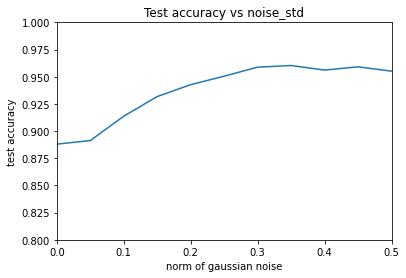

In [8]:
import matplotlib.pyplot as plt
noise_list_plot=np.array(noise_list)
plt.plot(noise_list_plot, acc_list_noise)  
plt.title("Test accuracy vs noise_std")
plt.xlabel("norm of gaussian noise")
plt.ylabel("test accuracy")

plt.ylim(0.8, 1)
plt.xlim(0, 0.5)
plt.show() 

In [0]:
print(acc_list_noise)